In [1]:
import ultralytics
import cv2
from ultralytics import YOLO
ultralytics.checks()
import matplotlib.pyplot as plt

%matplotlib inline


Ultralytics YOLOv8.1.26 🚀 Python-3.11.9 torch-2.2.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Setup complete ✅ (16 CPUs, 125.5 GB RAM, 584.7/914.8 GB disk)


In [2]:
model = "../models/best_yolov8_visdrone207212.pt"
model = YOLO(model)

In [3]:
results = model.track(source="../assets/180/180_vid_destb.mp4", conf=0.5, iou=0.5, tracker="bytetrack.yaml", stream=True)
cap = cv2.VideoCapture("../assets/180/180_vid_destb.mp4")


video 1/1 (frame 1/1200) /home/engine2/engine/UAV_Georeferencing/app/../assets/180/180_vid_destb.mp4: 384x640 1 bus, 158 cars, 2 trucks, 14 vans, 63.6ms


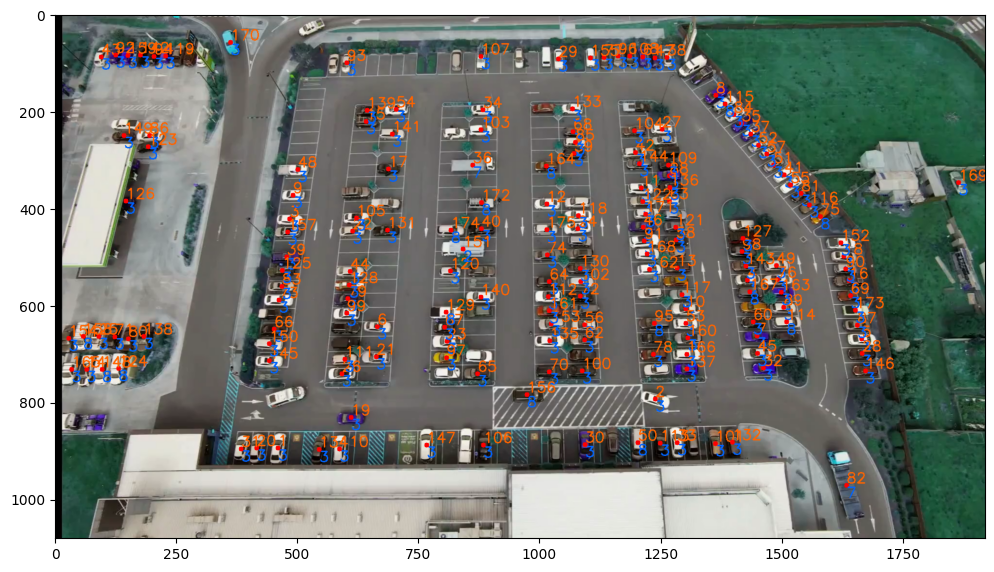

In [4]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    ret, frame = cap.read()
    if ret:
        # draw center of bounding box and the id and type of the object
        for i in range(len(boxes)):
            x, y = boxes[i].xywh[0,:2]
            cv2.circle(frame, (int(x), int(y)), 5, (255, 0, 0), -1)
            cv2.putText(frame, f"{int(boxes[i].id[0])} ", (int(x), int(y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 100, 0), 2)
            cv2.putText(frame, f"{int(boxes[i].cls[0])} ", (int(x), int(y + 25)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)
        # use plt to show the frame
        fig = plt.figure(figsize=(12, 12))
        plt.imshow(frame)
        plt.show()
    break
